**IMPORTING** **LIBRARIES**

In [ ]:
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#load the dataset
drive.mount('/content/drive')
df= pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")

Mounted at /content/drive


**UNDERSTANDING THE** **DATASET**

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data_types=df.dtypes
print("Data Types")
data_types

Data Types


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# Check for NaN values in the dataset
nan_counts = df.isnull().sum()

# Print the counts of NaN values for each column
print("Missing values")
print(nan_counts)

Missing values
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
duplicates = df.duplicated().any()
if  duplicates:
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [ ]:
# Count occurrences of 0 and 1 in the "isFraud" column
fraud_counts = df['isFraud'].value_counts()

# Print the counts
print("Count of non-fraudulent transactions (0):", fraud_counts[0])
print("Count of fraudulent transactions (1):", fraud_counts[1])

Count of non-fraudulent transactions (0): 6354407
Count of fraudulent transactions (1): 8213


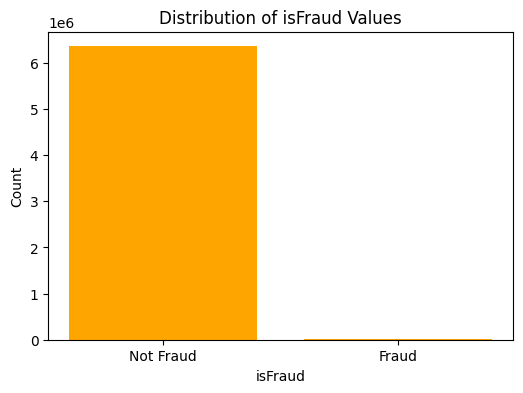

In [ ]:
# Count the occurrences of each value in the "isFraud" column
fraud_counts = df["isFraud"].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(6, 4))
plt.bar(fraud_counts.index, fraud_counts.values, color='orange')
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.title("Distribution of isFraud Values")
plt.xticks(fraud_counts.index, ['Not Fraud', 'Fraud'])
plt.show()

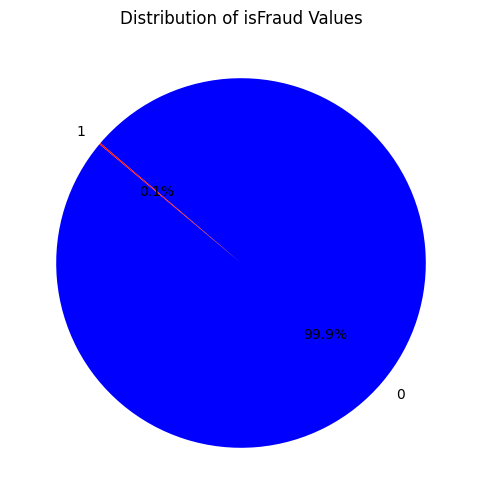

In [ ]:
# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, colors=['blue', 'red'], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of isFraud Values")
plt.show()

**EXPLORATORY DATA ANALYSIS**

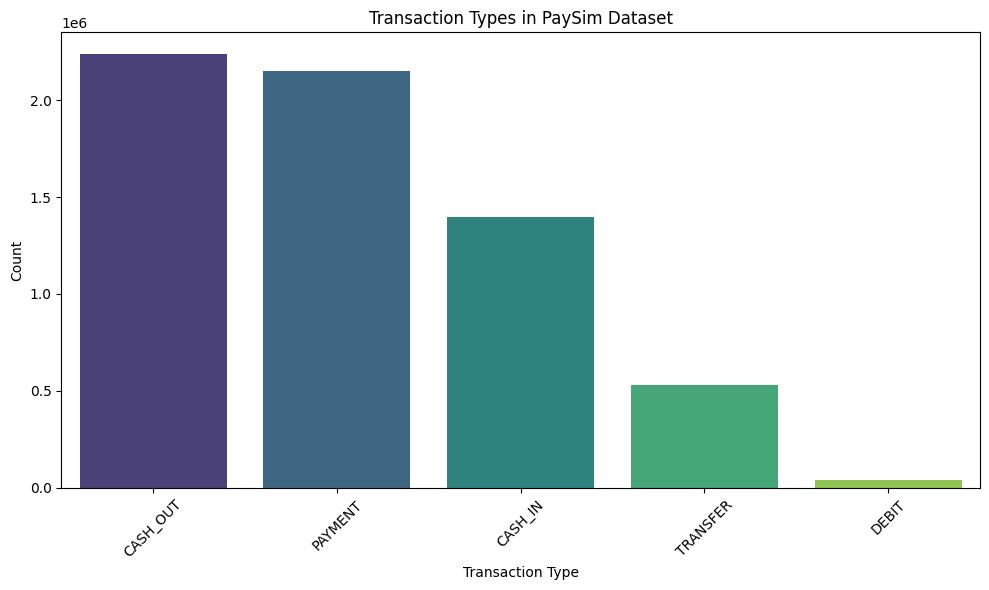

In [ ]:

# Group transactions by type and count the occurrences
transaction_counts = df['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Transaction Types in PaySim Dataset')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

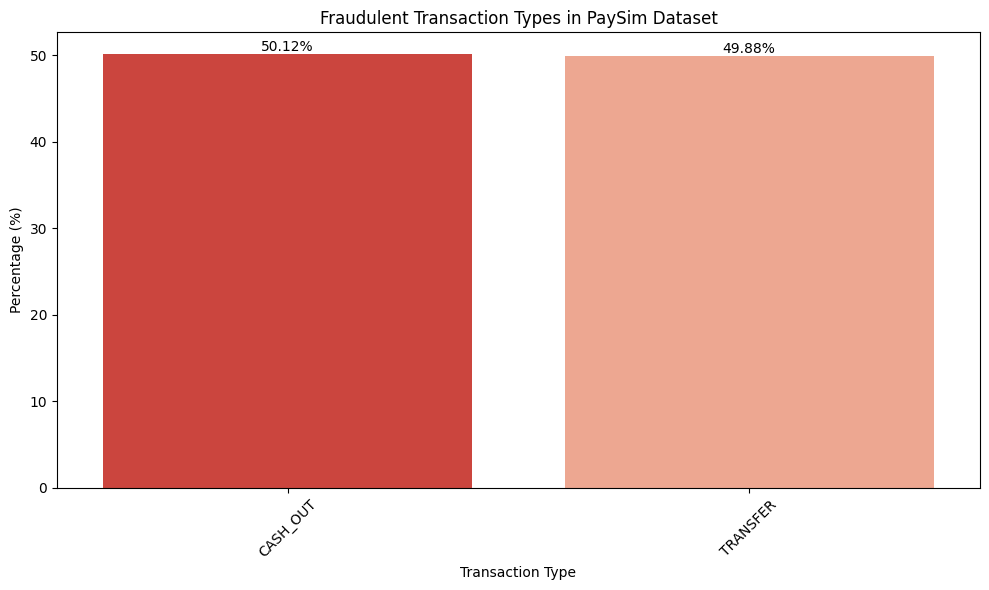

In [ ]:
# Filter the dataset to include only fraud transactions
fraud_df = df[df['isFraud'] == 1]

# Group fraud transactions by type and count the occurrences
fraud_transaction_counts = fraud_df['type'].value_counts()

# Calculate the percentage of each transaction type
fraud_transaction_percentages = (fraud_transaction_counts / fraud_transaction_counts.sum()) * 100

# Create a bar plot for fraud transactions with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=fraud_transaction_percentages.index, y=fraud_transaction_percentages.values, palette='Reds_r')
plt.title('Fraudulent Transaction Types in PaySim Dataset')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add percentages on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Filter the dataset to include only 'CASH_OUT' and 'TRANSFER' transaction types
filtered_df = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]

In [ ]:
filtered_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
filtered_df = filtered_df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

In [ ]:
filtered_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


# Preprocessing

Label Encoding the categorical columns

In [ ]:
categorical_columns = ['type']
# Label Encoding for categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    filtered_df[col] = le.fit_transform(filtered_df[col])
    label_encoders[col] = le

In [ ]:
filtered_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,1,181.00,181.00,0.0,0.00,0.00,1
3,1,0,181.00,181.00,0.0,21182.00,0.00,1
15,1,0,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,1,215310.30,705.00,0.0,22425.00,0.00,0
24,1,1,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,0,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,1,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,1,850002.52,850002.52,0.0,0.00,0.00,1


In [ ]:
filtered_df.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

String-based categorical variables cannot be used with machine learning models; as a result, we must convert them into numerical form.

Standarization

In [ ]:
# Filter the original dataframe to include only fraudulent transactions
fraudulent_df = filtered_df[filtered_df['isFraud'] == 1]

In [ ]:
fraudulent_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,1,181.00,181.00,0.0,0.00,0.00,1
3,1,0,181.00,181.00,0.0,21182.00,0.00,1
251,1,1,2806.00,2806.00,0.0,0.00,0.00,1
252,1,0,2806.00,2806.00,0.0,26202.00,0.00,1
680,1,1,20128.00,20128.00,0.0,0.00,0.00,1
...,...,...,...,...,...,...,...,...
6362615,743,0,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,1,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,1,850002.52,850002.52,0.0,0.00,0.00,1


In [ ]:
fraudulent_count = len(fraudulent_df)
print("Number of fraudulent samples:", fraudulent_count)

Number of fraudulent samples: 8213


In [ ]:
# Standard Scaling for numerical columns
scaler = StandardScaler()
columns_to_normalize = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
fraudulent_df[columns_to_normalize] = scaler.fit_transform(fraudulent_df[columns_to_normalize])

<ipython-input-22-e1ecc6e9ec3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_df[columns_to_normalize] = scaler.fit_transform(fraudulent_df[columns_to_normalize])


Concatenation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Define GAN parameters
latent_dim = 100
output_dim = fraudulent_df.shape[1]
input_dim = fraudulent_df.shape[1]
batch_size = 128
epochs = 80
num_generated_samples = 20000

# Define Generator and Discriminator networks
def build_generator(latent_dim, output_dim):
    model = keras.Sequential()
    model.add(layers.Input(shape=(latent_dim,)))
    model.add(layers.Dense(128, kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))  # Apply L2 regularization
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))  # Using LeakyReLU as specified
    model.add(layers.Dense(64, kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))  # Apply L2 regularization
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))  # Using LeakyReLU as specified
    model.add(layers.Dense(output_dim, activation='tanh'))
    return model

def build_discriminator(input_dim):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    model.add(layers.Dense(20, kernel_regularizer=tf.keras.regularizers.l2(1e-4)))  # Apply L2 regularization
    model.add(layers.LeakyReLU(alpha=0.2))  # Using LeakyReLU as specified
    model.add(layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(1e-4)))  # Apply L2 regularization
    model.add(layers.LeakyReLU(alpha=0.2))  # Using LeakyReLU as specified
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


# Define GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = True  # Set discriminator to trainable
    gan_input = layers.Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = keras.Model(gan_input, gan_output)
    return gan

# Build networks
generator = build_generator(latent_dim, output_dim)
discriminator = build_discriminator(input_dim)
gan = build_gan(generator, discriminator)

# Compile networks with different optimizers and loss functions
discriminator_optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=1e-4)  # Adjusted optimizer
generator_optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0002, weight_decay=1e-4)  # Adjusted optimizer


discriminator.compile(optimizer=discriminator_optimizer, loss='hinge')
gan.compile(optimizer=generator_optimizer, loss='hinge')

# Lists to store loss values
discriminator_losses = []
generator_losses = []

# Initialize loss lists
discriminator_losses = []
generator_losses = []

# Define training loop
def train_gan(generator, discriminator, gan, fraudulent_df, batch_size, latent_dim, epochs):
    for epoch in range(epochs):
        for _ in range(num_generated_samples // batch_size):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_data = generator.predict(noise)

            combined_data = np.concatenate([generated_data, fraudulent_df])
            labels = np.concatenate([np.ones((batch_size, 1)), -np.ones((fraudulent_df.shape[0], 1))])

            # Train discriminator
            discriminator_loss = discriminator.train_on_batch(combined_data, labels)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generator_loss = gan.train_on_batch(noise, -np.ones((batch_size, 1)))

        # Append the losses once per epoch
        discriminator_losses.append(discriminator_loss)
        generator_losses.append(generator_loss)

        print(f"Epoch {epoch}, Disc Loss: {discriminator_loss}, Gen Loss: {generator_loss}")

# Train GAN
train_gan(generator, discriminator, gan, fraudulent_df, batch_size, latent_dim, epochs)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 2ms/step
Epoch 48, Disc Loss: 1.0008312463760376, Gen Loss: 1.000657081604004
4/4 [==============================] - 0s 2ms/step
Epoch 49, Disc Loss: 1.0007851123809814, Gen Loss: 1.000618815422058
4/4 [==============================] - 0s 2ms/step
Epoch 50, Disc Loss: 1.0007405281066895, Gen Loss: 1.0005834102630615
4/4 [==============================] - 0s 2ms/step
Epoch 51, Disc Loss: 1.0006979703903198, Gen Loss: 1.0005491971969604
4/4 [==============================] - 0s 2ms/step
Epoch 52, Disc Loss: 1.0006574392318726, Gen Loss: 1.0005171298980713
4/4 [==============================] - 0s 2ms/step
Epoch 53, Disc Loss: 1.0006182193756104, Gen Loss: 1.0004867315292358
4/4 [==============================] - 0s 2ms/step
Epoch 54, Disc Loss: 1.0005807876586914, Gen Loss: 1.0004574060440063
4/4 [==============================] - 0s 2ms/step
Epoch 55, Disc Loss: 1.0005450248718262, Gen Loss: 1.

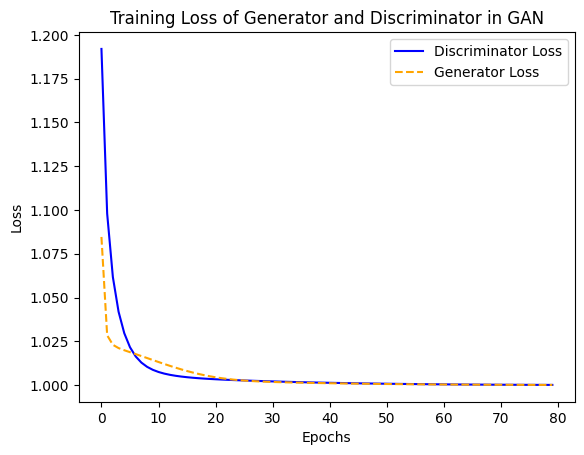

In [ ]:
import matplotlib.pyplot as plt

# Plot loss values
plt.plot(discriminator_losses, label='Discriminator Loss', color='blue', linestyle='solid')  # Use solid line
plt.plot(generator_losses, label='Generator Loss', color='orange', linestyle='dashed')  # Use dashed line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss of Generator and Discriminator in GAN')
plt.legend()
plt.show()

In [ ]:

# Generate synthetic fraudulent transactions
def generate_synthetic_fraud_samples(generator, num_samples, latent_dim):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_samples = generator.predict(noise)
    return synthetic_samples

# Generate synthetic fraud samples
synthetic_fraud_samples = generate_synthetic_fraud_samples(generator, num_generated_samples, latent_dim)

625/625 [==============================] - 1s 1ms/step


In [ ]:
# Generate new fraudulent samples
noise = np.random.normal(0, 1, (num_generated_samples, latent_dim))
generated_data_fraud = generator.predict(noise)

625/625 [==============================] - 1s 1ms/step


In [ ]:
import pandas as pd

# Assuming you have column names in the 'fraudulent_df' DataFrame
column_names = fraudulent_df.columns.tolist()
generated_df_fraud = pd.DataFrame(data=generated_data_fraud, columns=column_names)


In [ ]:
generated_df_fraud

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,-0.938685,0.898127,-0.811418,0.891981,-0.930221,-0.826640,-0.858874,0.936982
1,-0.967985,0.953033,-0.858375,0.917797,-0.961752,-0.876618,-0.892219,0.968001
2,-0.966538,0.951130,-0.854695,0.915242,-0.960166,-0.873353,-0.889185,0.966619
3,-0.884397,0.839590,-0.746898,0.841824,-0.891345,-0.757413,-0.745033,0.905353
4,-0.953730,0.936710,-0.828401,0.894232,-0.948168,-0.845168,-0.862195,0.956489
...,...,...,...,...,...,...,...,...
19995,-0.935269,0.892407,-0.805442,0.889659,-0.925974,-0.822909,-0.852040,0.933154
19996,-0.929549,0.911161,-0.786680,0.859175,-0.926578,-0.799769,-0.818380,0.938105
19997,-0.906246,0.868796,-0.776387,0.860918,-0.908438,-0.772467,-0.795577,0.921131
19998,-0.965795,0.939626,-0.866931,0.924245,-0.961120,-0.871292,-0.910126,0.964913


In [ ]:
generated_df_fraud['isFraud'] = 1

# Concatenate generated fraudulent samples with the original dataframe
combined_df = pd.concat([filtered_df, generated_df_fraud], ignore_index=True)

# Check the count of fraudulent transactions in the generated samples
generated_fraud_count = len(generated_df_fraud)
print(f"Count of Fraudulent Transactions in Generated Samples: {generated_fraud_count}")

Count of Fraudulent Transactions in Generated Samples: 20000


In [ ]:
# Count occurrences of 0 and 1 in the "isFraud" column
fraud_countscd = combined_df['isFraud'].value_counts()

# Print the counts
print("Count of non-fraudulent transactions (0):", fraud_countscd[0])
print("Count of fraudulent transactions (1):", fraud_countscd[1])

Count of non-fraudulent transactions (0): 2762196
Count of fraudulent transactions (1): 28213


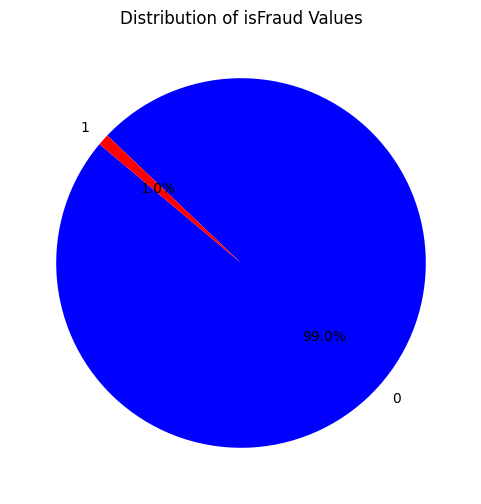

In [ ]:
# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(fraud_countscd, labels=fraud_countscd.index, colors=['blue', 'red'], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of isFraud Values")
plt.show()

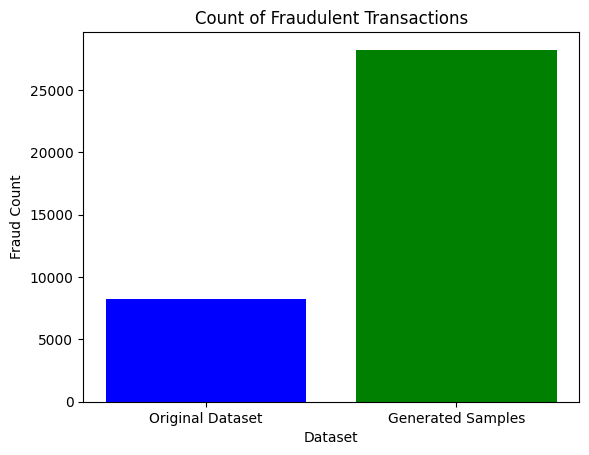

In [ ]:
# Calculate counts of fraudulent transactions in the original dataset and generated samples
original_fraud_count = len(filtered_df[filtered_df['isFraud'] == 1])
generated_fraud_count = len(combined_df[combined_df['isFraud'] == 1])

# Create a bar plot
labels = ['Original Dataset', 'Generated Samples']
fraud_counts = [original_fraud_count, generated_fraud_count]

plt.bar(labels, fraud_counts, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Fraud Count')
plt.title('Count of Fraudulent Transactions')
plt.show()

The distribution of the generated data and the original data is visualized. Hence, correctly the fradulent data is generated.

In [ ]:
combined_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1.000000,1.000000,181.000000,181.000000,0.000000,0.000000,0.000000e+00,1
1,1.000000,0.000000,181.000000,181.000000,0.000000,21182.000000,0.000000e+00,1
2,1.000000,0.000000,229133.940000,15325.000000,0.000000,5083.000000,5.151344e+04,0
3,1.000000,1.000000,215310.300000,705.000000,0.000000,22425.000000,0.000000e+00,0
4,1.000000,1.000000,311685.890000,10835.000000,0.000000,6267.000000,2.719173e+06,0
...,...,...,...,...,...,...,...,...
2790404,-0.935269,0.892407,-0.805442,0.889659,-0.925974,-0.822909,-8.520399e-01,1
2790405,-0.929549,0.911161,-0.786680,0.859175,-0.926578,-0.799769,-8.183802e-01,1
2790406,-0.906246,0.868796,-0.776387,0.860918,-0.908438,-0.772467,-7.955769e-01,1
2790407,-0.965795,0.939626,-0.866931,0.924245,-0.961120,-0.871292,-9.101257e-01,1


In [ ]:
# Check for NaN values in the dataset
nan_counts = combined_df.isnull().sum()

# Print the counts of NaN values for each column
print("NaN Value Counts:")
print(nan_counts)

NaN Value Counts:
step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [ ]:
# Drop rows with NaN values from the dataset
combined_df = combined_df.dropna()

In [ ]:
# Separate features (X) and target variable (y)
A = filtered_df.drop('isFraud', axis=1)
B = filtered_df['isFraud']

In [ ]:
# Separate features (X) and target variable (y)
X = combined_df.drop('isFraud', axis=1)
y = combined_df['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
# Normalization of the dataset
std_scaler = StandardScaler()
A_scaled = pd.DataFrame(std_scaler.fit_transform(A), columns=A.columns)

# Split the data into training and testing sets
A_train_original, A_test_original, B_train_original, B_test_original = train_test_split(A_scaled, B, test_size=0.3, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Normalization of the dataset
std_scaler = StandardScaler()
X_scaled = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


AUTOENCODER ORIGINAL DATA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define the autoencoder model
input_size = A_train_original.shape[1]
encoding_dimension = 16

# Encoder
Encoder_input = Input(shape=(input_size,))
Encoder_hidden = Dense(256, activation='relu')(Encoder_input)
Encoder_hidden = Dense(encoding_dimension, activation='relu')(Encoder_hidden)

# Create the encoder model
Encoder = Model(Encoder_input, Encoder_hidden)

# Decoder
Decoder_input = Input(shape=(encoding_dimension,))
Decoder_hidden = Dense(256, activation='relu')(Decoder_input)
Decoder_output = Dense(input_size, activation='linear')(Decoder_hidden)

# Create the decoder model
Decoder = Model(Decoder_input, Decoder_output)

# Combine the encoder and decoder to create the autoencoder
Autoencoder_input = Input(shape=(input_size,))
Encoded = Encoder(Autoencoder_input)
Decoded = Decoder(Encoded)

# Create the autoencoder model
Autoencoder = Model(Autoencoder_input, Decoded)

# Compile the autoencoder model
Autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the autoencoder with early stopping
Autoencoder.fit(A_train_original, A_train_original, epochs=100, batch_size=256, shuffle=True, validation_split=0.1, callbacks=[early_stopping])

# Obtain encoded features
Encoded_features = Encoder.predict(A_train_original)

# Build and compile the classification model
Classifier_input = Input(shape=(encoding_dimension,))
Classifier_hidden = Dense(128, activation='relu')(Classifier_input)
Classifier_output = Dense(1, activation='sigmoid')(Classifier_hidden)

# Compile the classifier model
Classifier = Model(inputs=Classifier_input, outputs=Classifier_output)
Classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data for training the classifier
A_encoded_train, A_encoded_test, B_encoded_train, B_encoded_test = train_test_split(Encoded_features, B_train_original, test_size=0.2, random_state=42)

# Train the classifier
Classifier.fit(A_encoded_train, B_encoded_train, epochs=100, batch_size=256, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

# Predict on the training set
B_prediction_train_auto = Classifier.predict(A_encoded_train)
B_pred_conversion_train_auto = (B_prediction_train_auto > 0.5).astype("int32")


# Predict on the test set
B_prediction_auto = Classifier.predict(A_encoded_test)
B_pred_conversion_auto = (B_prediction_auto > 0.5).astype("int32")

# Calculate metrics for the training set
accuracy_train_auto = accuracy_score(B_encoded_train, B_pred_conversion_train_auto)
precision_train_auto = precision_score(B_encoded_train, B_pred_conversion_train_auto)
recall_train_auto = recall_score(B_encoded_train, B_pred_conversion_train_auto)
roc_auc_train_auto = roc_auc_score(B_encoded_train, B_prediction_train_auto)
f1_train_auto = f1_score(B_encoded_train, B_pred_conversion_train_auto)

# Calculate metrics for the test set
accuracy_test_auto = accuracy_score(B_encoded_test, B_pred_conversion_auto)
precision_test_auto = precision_score(B_encoded_test, B_pred_conversion_auto)
recall_test_auto = recall_score(B_encoded_test, B_pred_conversion_auto)
roc_auc_test_auto = roc_auc_score(B_encoded_test, B_prediction_auto)
f1_test_auto = f1_score(B_encoded_test, B_pred_conversion_auto)

# Manual cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_cv, precision_cv, recall_cv, roc_auc_cv, f1_cv = [], [], [], [], []

for train_index, test_index in skf.split(Encoded_features, B_train_original):
    A_train_cv, A_test_cv = Encoded_features[train_index], Encoded_features[test_index]
    B_train_cv, B_test_cv = B_train_original.iloc[train_index], B_train_original.iloc[test_index]

    # Train the classifier
    Classifier.fit(A_train_cv, B_train_cv, epochs=100, batch_size=256, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    # Predict on the test set
    B_pred_cv = Classifier.predict(A_test_cv)
    B_pred_conversion_cv = (B_pred_cv > 0.5).astype("int32")

    # Calculate metrics for the current fold
    accuracy_fold = accuracy_score(B_test_cv, B_pred_conversion_cv)
    precision_fold = precision_score(B_test_cv, B_pred_conversion_cv)
    recall_fold = recall_score(B_test_cv, B_pred_conversion_cv)
    roc_auc_fold = roc_auc_score(B_test_cv, B_pred_cv)
    f1_fold = f1_score(B_test_cv, B_pred_conversion_cv)

    accuracy_cv.append(accuracy_fold)
    precision_cv.append(precision_fold)
    recall_cv.append(recall_fold)
    roc_auc_cv.append(roc_auc_fold)
    f1_cv.append(f1_fold)

# Calculate average metrics for cross-validation
accuracy_cv_avg = np.mean(accuracy_cv)
precision_cv_avg = np.mean(precision_cv)
recall_cv_avg = np.mean(recall_cv)
roc_auc_cv_avg = np.mean(roc_auc_cv)
f1_cv_avg = np.mean(f1_cv)

# Print the metrics for the training set for original data
print(f"\nTrain Accuracy: {accuracy_train_auto}")
print(f"Train Precision: {precision_train_auto}")
print(f"Train Recall: {recall_train_auto}")
print(f"Train ROC AUC: {roc_auc_train_auto}")
print(f"Train F1 Score: {f1_train_auto}")

# Print the metrics for the test set for original data
print(f"\nTest Accuracy: {accuracy_test_auto}")
print(f"Test Precision: {precision_test_auto}")
print(f"Test Recall: {recall_test_auto}")
print(f"Test ROC AUC: {roc_auc_test_auto}")
print(f"Test F1 Score: {f1_test_auto}")

# Print the metrics for cross-validation for original data
print(f"\nCross-Validation Accuracy: {accuracy_cv_avg}")
print(f"Cross-Validation Precision: {precision_cv_avg}")
print(f"Cross-Validation Recall: {recall_cv_avg}")
print(f"Cross-Validation ROC AUC: {roc_auc_cv_avg}")
print(f"Cross-Validation F1 Score: {f1_cv_avg}")


Epoch 1/100
6818/6818 [==============================] - 22s 3ms/step - loss: 0.0160 - val_loss: 7.8313e-04
Epoch 2/100
6818/6818 [==============================] - 21s 3ms/step - loss: 0.0151 - val_loss: 0.0123
Epoch 3/100
6818/6818 [==============================] - 21s 3ms/step - loss: 0.0181 - val_loss: 0.0137
Epoch 4/100
6818/6818 [==============================] - 21s 3ms/step - loss: 0.0104 - val_loss: 0.0013
Epoch 5/100
6818/6818 [==============================] - 21s 3ms/step - loss: 0.0118 - val_loss: 9.5884e-04
Epoch 6/100
6818/6818 [==============================] - 21s 3ms/step - loss: 0.0102 - val_loss: 0.0013
Epoch 7/100
6818/6818 [==============================] - 21s 3ms/step - loss: 0.0083 - val_loss: 0.0038
Epoch 8/100
6818/6818 [==============================] - 21s 3ms/step - loss: 0.0087 - val_loss: 0.0028
Epoch 9/100
6818/6818 [==============================] - 21s 3ms/step - loss: 0.0072 - val_loss: 0.0204
Epoch 10/100
6818/6818 [==============================] 

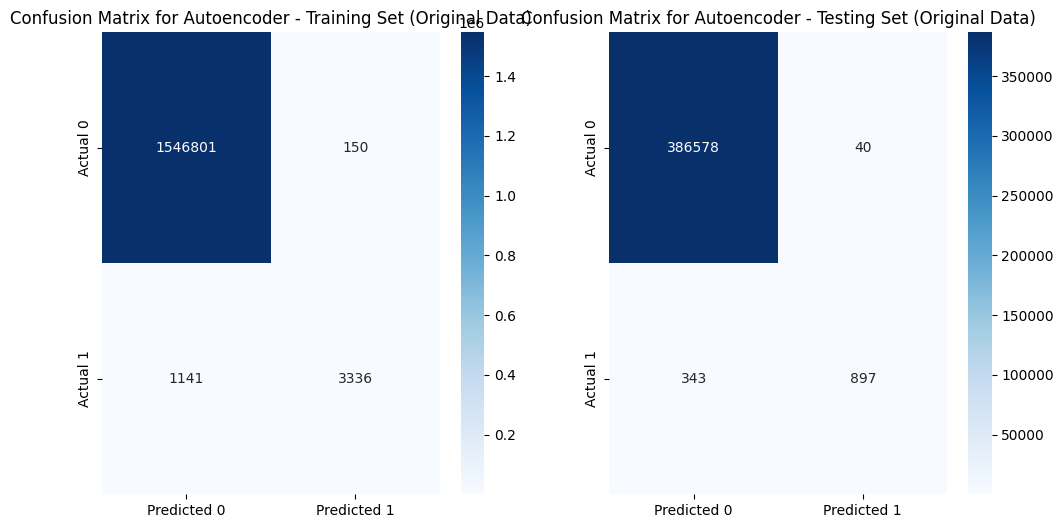

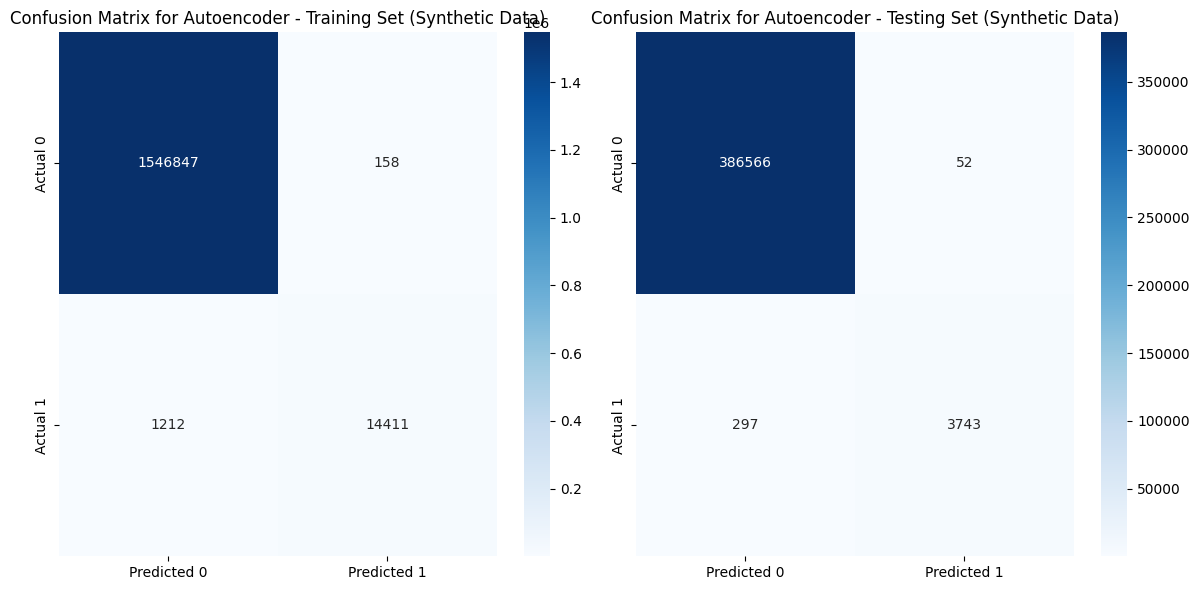

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrices for original data
train_cm_auto = confusion_matrix(B_encoded_train, B_pred_conversion_train_auto)
test_cm_auto = confusion_matrix(B_encoded_test, B_pred_conversion_auto)

# Visualize confusion matrix for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm_auto, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Autoencoder - Training Set (Original Data)')

# Visualize confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm_auto, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Autoencoder - Testing Set (Original Data)')

# Visualize confusion matrix for synthetic data
train_cm_syn_auto = confusion_matrix(y_encoded_train, y_pred_conversion_train_auto_syn)
test_cm_syn_auto = confusion_matrix(y_encoded_test, y_pred_conversion_auto_syn)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm_syn_auto, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Autoencoder - Training Set (Synthetic Data)')

# Visualize confusion matrix for testing set
plt.subplot(1, 2, 2)
sns.heatmap(test_cm_syn_auto, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Autoencoder - Testing Set (Synthetic Data)')
plt.tight_layout()
plt.show()


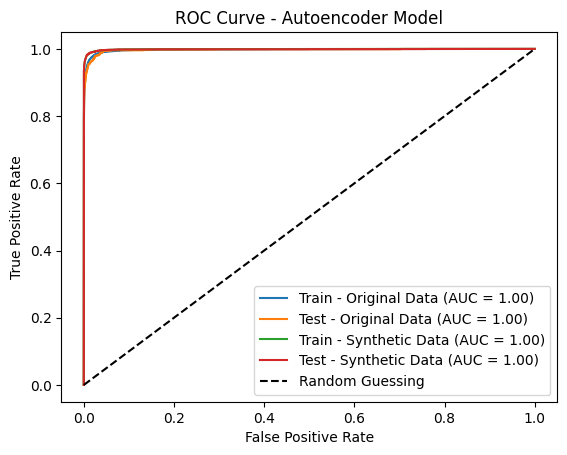


AUC Score - Train (Original Data): 1.00
AUC Score - Test (Original Data): 1.00
AUC Score - Train (Synthetic Data): 1.00
AUC Score - Test (Synthetic Data): 1.00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Function to calculate and plot ROC curve
def calculate_and_plot_roc_auc(y_true, y_pred_prob, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

# Calculate AUC and plot ROC curve for training set - Original Data
train_auc_original = roc_auc_score(B_encoded_train, B_prediction_train_auto)
calculate_and_plot_roc_auc(B_encoded_train, B_prediction_train_auto, label='Train - Original Data')

# Calculate AUC and plot ROC curve for testing set - Original Data
test_auc_original = roc_auc_score(B_encoded_test, B_prediction_auto)
calculate_and_plot_roc_auc(B_encoded_test, B_prediction_auto, label='Test - Original Data')

# Calculate AUC and plot ROC curve for training set - Synthetic Data
train_auc_synthetic = roc_auc_score(y_encoded_train, y_prediction_train_auto_syn)
calculate_and_plot_roc_auc(y_encoded_train, y_prediction_train_auto_syn, label='Train - Synthetic Data')

# Calculate AUC and plot ROC curve for testing set - Synthetic Data
test_auc_synthetic = roc_auc_score(y_encoded_test, y_prediction_auto_syn)
calculate_and_plot_roc_auc(y_encoded_test, y_prediction_auto_syn, label='Test - Synthetic Data')

# Display the ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Autoencoder Model')
plt.legend()
plt.show()

# Print AUC scores
print(f"\nAUC Score - Train (Original Data): {train_auc_original:.2f}")
print(f"AUC Score - Test (Original Data): {test_auc_original:.2f}")
print(f"AUC Score - Train (Synthetic Data): {train_auc_synthetic:.2f}")
print(f"AUC Score - Test (Synthetic Data): {test_auc_synthetic:.2f}")
